In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Khai báo thư viện

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Thuật toán sGA

## Khởi tạo quần thể

In [ ]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

## Hàm đánh giá độ thích nghi của quần thể

### Hàm onemax

In [ ]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

### Hàm concatenated_trap

In [ ]:
def concatenated_trap_k(ind, k):
  fitness = 0
  for i in range(0, len(ind), k):
    u = 0
    for j in range(0, k):
      u += ind[i + j]
    if u == k:
      fitness += k
    else:
      fitness += (k - 1 - u)

  return fitness 

### Hàm đánh giá độ thích nghi

In [ ]:
def evaluate_population(pop, number_of_evaluations, evaluation_method):
    """
    Hàm đánh giá tất cả cá thể trong quần thể.
    
    Arguments:
    pop -- Quàn thể cần được đánh giá.

    Returns:
    values -- Giá trị của tất cả các cá thể trong quần thể.
    """ 

    ### BẮT ĐẦU CODE TỪ ĐÂY ###
    if evaluation_method == 1:
      values = np.array([onemax(ind) for ind in pop])
    else:
      values = np.array([concatenated_trap_k(ind, 5) for ind in pop])
    number_of_evaluations += len(pop)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return values, number_of_evaluations

## Hàm so sánh độ thích nghi giữa 2 cá thể

In [ ]:
def better_fitness( fitness_1, fitness_2, maximization=True ):
    """
    Hàm so sánh độ thích nghi của 2 cá thể.
    
    Arguments:
    fitness_1 -- Độ thích nghi của cá thể 1.
    fitness_2 -- Độ thích nghi của cá thể 2.
    maximization -- Biến boolean cho biết bài toán đang giải thuộc dạng tối đa hoá (mặc định) hay không
    
    Returns:
    True nếu fitness_1 tốt hơn fitness_2. Ngược lại, trả về False.
    """
    
    if maximization:
        if fitness_1 > fitness_2:
            return True
    else:
        if fitness_1 < fitness_2:
            return True
        
    return False

## Tourament selection

In [ ]:
def tournament_selection( pop, pop_fitness, selection_size, tournament_size):
    """
    Hàm chọn lọc cạnh tranh.
    
    Arguments:
    pop -- Quần thể để thực hiện phép chọn lọc.
    pop_fitness -- Mảng 1 chiều chứa giá trị (độ thích nghi) của từng cá thể trong quần thể.
    selection_size -- Số lượng cá thể sẽ được chọn.
    tournament_size -- Kích thước của tournament: Số lượng các cá thể được so sánh với nhau mỗi lần.
    
    Returns:
    selected_indices -- Chỉ số của những cá thể trong quần thể pop được chọn. Chỉ số có thể được lặp lại.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    indices = np.arange(num_individuals)
    selected_indices = []
    
    while len(selected_indices) < selection_size:
        # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể.
        np.random.shuffle(indices)
        
        for i in range(0, num_individuals, tournament_size):
          best_idx = i
          for idx in range(1, tournament_size):
            if better_fitness(pop_fitness[indices[i+idx]], pop_fitness[indices[best_idx]]):
              best_idx = i + idx
          selected_indices.append(indices[best_idx])
    
    selected_indices = np.array(selected_indices)        

    ### DỪNG CODE TẠI ĐÂY ###
    
    return selected_indices

## Hàm lai ghép quần thể

### Uniform crossover

In [ ]:
def uniform_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters):
          r = np.random.rand()
          if r < 0.5:
            temp = offspring2[idx]
            offspring2[idx] = offspring1[idx]
            offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

### One-point crossover

In [ ]:
def onePoint_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai một điểm one-point crossover. 
        # Không cần cài đặt đột biến mutation.
        idx = np.random.randint(1,num_parameters)
        temp1 = offspring1[idx:] 
        temp2 = offspring2[idx:] 
        offspring1 = np.concatenate((offspring1[:idx], temp2), axis=None)
        offspring2 = np.concatenate((offspring2[:idx], temp1), axis=None)

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

## Hàm kiểm tra hội tụ của quần thể

In [ ]:
def check_convergence(pop_fitness):
  if len(np.unique(pop_fitness)) == 1:
    return True
    
  return False

## Hàm kiểm tra tối ưu của quần thể

In [ ]:
def check_optimal(num_parameters, pop_fitness):
  if num_parameters in pop_fitness:
    return True

  return False

## Thuật toán POPOP

In [ ]:
def popop(num_individuals, num_parameters, number_of_evaluations, evaluation_method, crossover_method):
    """
    Hàm cài đặt thuật giải di truyền theo các bước P->O->(P+O)->P
    
    Arguments:
    num_individuals -- Số lượng cá thể trong quần thể.
    num_parameters -- Số lượng biến.
    num_generations -- Số thế hệ thuật toán sẽ chạy.

    Returns:
    In ra quần thể ở thế hệ cuối cùng và giá trị của từng cá thể.
    """ 

    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    # Khởi tạo quần thể
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness, number_of_evaluations = evaluate_population(pop, number_of_evaluations, evaluation_method)
    # print("#Gen 0:")
    # print(pop)
    # print(pop_fitness)
    
    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    while not check_convergence(pop_fitness):
        # Tạo ra các cá thể con và đánh giá chúng
        if crossover_method == 1:
          offspring = onePoint_crossover(pop)
        else:
          offspring = uniform_crossover(pop)
        offspring_fitness, number_of_evaluations = evaluate_population(offspring, number_of_evaluations, evaluation_method)
        
        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool 
        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        # print("#Gen {}:".format(i+1))
        # print(pop_fitness)

    ## DỪNG CODE TẠI ĐÂY ###
    # print("#Result:")
    # print(pop)
    # print(pop_fitness)

    return pop_fitness, number_of_evaluations

## Hàm đánh giá thuật toán sGA với 10 random seed khác nhau

In [ ]:
def evaluate_sGA(num_individuals, num_parameters, seed, evaluation_method, crossover_method):
  number_of_evaluations_per_seed = 0
  number_of_evaluations_per_seed_lst = []

  for i in range(seed, seed+10):
    np.random.seed(i)
    final_offspring, number_of_evaluations_per_seed = popop(num_individuals, num_parameters, number_of_evaluations_per_seed, evaluation_method, crossover_method)
    number_of_evaluations_per_seed_lst.append(number_of_evaluations_per_seed)
    if not check_optimal(num_parameters, final_offspring):
      return [False, np.mean(number_of_evaluations_per_seed_lst)]

  return [True, np.mean(number_of_evaluations_per_seed_lst)]

## Hàm tìm kiếm cận trên của population size

In [ ]:
def upper_bound(num_parameters, seed, cant_solve, evaluation_method, crossover_method):
  upper_popSize = 4
  while not evaluate_sGA(upper_popSize, num_parameters, seed, evaluation_method, crossover_method)[0]:
    upper_popSize *= 2

    if upper_popSize > 8192:
      cant_solve = True
      break

  return upper_popSize, cant_solve

## Hàm tìm kiếm MRPS của quần thể

In [ ]:
def MRPS(num_parameters, upper_popSize, seed, evaluation_method, crossover_method):
  number_of_evaluations_per_popSize_lst = []

  lower_popSize = upper_popSize // 2
  while (upper_popSize - lower_popSize) / upper_popSize > 0.1:
    popSize = (upper_popSize + lower_popSize) // 2
    [flag, number_of_evaluations_per_popSize] = evaluate_sGA(popSize, num_parameters, seed, evaluation_method, crossover_method)
    number_of_evaluations_per_popSize_lst.append(number_of_evaluations_per_popSize)
    if flag:
      upper_popSize = popSize
    else:
      lower_popSize = popSize

    if (upper_popSize - lower_popSize) <= 2:
      break

  return upper_popSize, round(number_of_evaluations_per_popSize_lst[-1], 2)

## Hàm ghi chép quá trình tiến hóa của quần thể

In [ ]:
def record(lines):
  record_file = open('evolutionary_history_record.txt', 'a')
  for line in lines:
    record_file.write(line)
    record_file.write('\n')
    print(line)

In [ ]:
def evolutionary_history_record(evaluation_method=None, crossover_method=None, problemSize=None, type_record=None, values_each_bisection=None, values_each_problemSize=None):
  evaluation_dict = {1:'Onemax', 2:'Concatenated Trap-5'}
  crossover_dict = {1: 'One-point Crossover', 2:'Uniform Crossover'}
  lines = []
  
  if type_record == 1:
    line = f'- Evaluation = {evaluation_dict[evaluation_method]}, Crossover = {crossover_dict[crossover_method]}'
    lines.append(line)
    record(lines)
  elif type_record == 2:
    if values_each_bisection[1] == True:
      line1 = f'\t\t{values_each_bisection[0]+1}-th bisection'
      line2 = '\t\t\tThis bisection cant be solved!'
      lines.append(line1)
      lines.append(line2)
      record(lines)
    else:
      line1 = f'\t\t{values_each_bisection[0]+1}-th bisection'
      line2 = f'\t\t\tMRPS: {values_each_bisection[2]}'
      line3 = f'\t\t\tAverage number of evaluations each bisection: {values_each_bisection[3]}'
      lines.append(line1)
      lines.append(line2)
      lines.append(line3)
      record(lines)
  elif type_record == 3:
    if values_each_problemSize is None:
      line = f'\tThis problem size cant be solved!\n'
      lines.append(line)
      record(lines)
    else:
      line1 = f'\t\tMean MRPS: {values_each_problemSize[0]}'
      line2 = f'\t\tStd MRPS: {values_each_problemSize[1]}'
      line3 = f'\t\tMean number of evaluations: {values_each_problemSize[2]}'
      line4 = f'\t\tStd number of evaluations: {values_each_problemSize[3]}\n'
      lines.append(line1)
      lines.append(line2)
      lines.append(line3)
      lines.append(line4)
      record(lines)
  elif type_record == 4:
    line = '\n|-----------------------------------DONE-----------------------------------|'
    lines.append(line)
    record(lines)
  elif type_record == 5:
    line1 = '|------------------------EVOLUTIONARY HISTORY RECORD------------------------|'
    line2 = '|-----------------------------------BEGIN-----------------------------------|\n\n'
    lines.append(line1)
    lines.append(line2)
    record(lines)
  elif type_record == 6:
    line = '\tSaved record!\n'
    lines.append(line)
    record(lines)
  elif type_record == 7:
    line = '\tSaving...'
    lines.append(line)
    record(lines)
  if type_record == 8:
    line = f'\t- Problem size = {problemSize}'
    lines.append(line)
    record(lines)

# Thuật toán Bisection

In [ ]:
def bisection(evaluation_method, crossover_method):
  MSSV = 19521943
  seed_lst = []
  for i in range(0, 100, 10):
    seed_lst.append(MSSV+i)

  average_popSize_lst = []
  std_popSize_lst = []
  average_number_of_evaluations_lst = []
  std_number_of_evaluations_lst = []
  # cant_solve_lst = []
  # solved_problemSize_lst = []
  num_parameters_lst = [10, 20, 40, 80, 160]

  evolutionary_history_record(evaluation_method=evaluation_method, crossover_method=crossover_method, type_record=1)
  for num_parameters in num_parameters_lst:
    evolutionary_history_record(problemSize=num_parameters, type_record=8)

    solved_bisection = 0
    popSize_lst = []
    number_of_evaluations_lst = []

    # Bisection loop
    for seed in seed_lst:
      cant_solve = False
      upper_popSize, cant_solve = upper_bound(num_parameters, seed, cant_solve, evaluation_method, crossover_method)
      # cant_solve_lst.append(cant_solve)
      if cant_solve:
        evolutionary_history_record(type_record=2, values_each_bisection=[seed_lst.index(seed), cant_solve])
        continue
      solved_bisection += 1
      popSize, number_of_evaluations = MRPS(num_parameters, upper_popSize, seed, evaluation_method, crossover_method)
      evolutionary_history_record(type_record=2, values_each_bisection=[seed_lst.index(seed), cant_solve, popSize, number_of_evaluations])
      popSize_lst.append(popSize)
      number_of_evaluations_lst.append(int(number_of_evaluations))

    if solved_bisection == 0:
      evolutionary_history_record(type_record=3)

      if num_parameters == num_parameters_lst[-1]:
        break

      unsolved_problemSize_lst = num_parameters_lst[num_parameters_lst.index(num_parameters)+1:]
      if len(unsolved_problemSize_lst) > 0:
        for problemSize in unsolved_problemSize_lst:
          evolutionary_history_record(problemSize=problemSize, type_record=8)
          evolutionary_history_record(type_record=3)
      
      break
    else:
      average_popSize_lst.append(round(np.mean(popSize_lst), 2))
      average_number_of_evaluations_lst.append(round(np.mean(number_of_evaluations_lst), 2))
      std_popSize_lst.append(round(np.std(popSize_lst), 2))
      std_number_of_evaluations_lst.append(round(np.std(number_of_evaluations_lst), 2))
      # solved_problemSize_lst.append(num_parameters)
      evolutionary_history_record(type_record=3, values_each_problemSize=[round(np.mean(popSize_lst), 2), 
                                                                          round(np.std(popSize_lst), 2), 
                                                                          round(np.mean(number_of_evaluations_lst), 2), 
                                                                          round(np.std(number_of_evaluations_lst), 2)])

  return average_popSize_lst, average_number_of_evaluations_lst, std_popSize_lst, std_number_of_evaluations_lst

# Chạy thuật toán Bisection

In [ ]:
methods = [(1,1), (1,2), (2,1), (2,2)]

header = ['Algorithm', 'Problem_size', 'Mean_MRPS', 'Std_MRPS', 'Mean_Evaluations', 'Std_Evaluations']

fi1 = open('result_onemax.csv', 'w')
writer1 = csv.writer(fi1)
writer1.writerow(header)

fi2 = open('result_trap5.csv', 'w')
writer2 = csv.writer(fi2)
writer2.writerow(header)

evolutionary_history_record(type_record=5)
for evaluation_method, crossover_method in methods:
  
  sGA_oneX = np.array([['sGA-1X'] *5])
  sGA_UX = np.array([['sGA-UX'] *5])
  problemSize_lst = np.array([[10, 20, 40, 80, 160]])
  
  average_popSize_lst, average_number_of_evaluations_lst, std_popSize_lst, std_number_of_evaluations_lst = bisection(evaluation_method, crossover_method)
  if len(average_popSize_lst) != 5:
    nan = ['NaN'] * (5 - len(average_popSize_lst))
    average_popSize_lst += nan
    average_number_of_evaluations_lst += nan
    std_popSize_lst += nan
    std_number_of_evaluations_lst += nan
  
  average_popSize_lst = np.array([average_popSize_lst])
  average_number_of_evaluations_lst = np.array([average_number_of_evaluations_lst])
  std_popSize_lst = np.array([std_popSize_lst])
  std_number_of_evaluations_lst = np.array([std_number_of_evaluations_lst])

  if crossover_method == 1:
    data = np.concatenate((sGA_oneX.T, problemSize_lst.T, average_popSize_lst.T, std_popSize_lst.T, average_number_of_evaluations_lst.T, std_number_of_evaluations_lst.T), axis=1)
    evolutionary_history_record(type_record=7)
  else:
    data = np.concatenate((sGA_UX.T, problemSize_lst.T, average_popSize_lst.T, std_popSize_lst.T, average_number_of_evaluations_lst.T, std_number_of_evaluations_lst.T), axis=1)
    evolutionary_history_record(type_record=7)

  if evaluation_method == 1:
    writer1.writerows(data)
    evolutionary_history_record(type_record=6)
  else:
    writer2.writerows(data)
    evolutionary_history_record(type_record=6)

evolutionary_history_record(type_record=4)
fi1.close()
fi2.close()

|------------------------EVOLUTIONARY HISTORY RECORD------------------------|
|-----------------------------------BEGIN-----------------------------------|


- Evaluation = Onemax, Crossover = One-point Crossover
	- Problem size = 10
		1-th bisection
			MRPS: 30
			Average number of evaluations each bisection: 1167.0
		2-th bisection
			MRPS: 34
			Average number of evaluations each bisection: 1564.0
		3-th bisection
			MRPS: 28
			Average number of evaluations each bisection: 676.0
		4-th bisection
			MRPS: 44
			Average number of evaluations each bisection: 1839.2
		5-th bisection
			MRPS: 44
			Average number of evaluations each bisection: 1751.2
		6-th bisection
			MRPS: 36
			Average number of evaluations each bisection: 659.6
		7-th bisection
			MRPS: 28
			Average number of evaluations each bisection: 587.6
		8-th bisection
			MRPS: 36
			Average number of evaluations each bisection: 1005.43
		9-th bisection
			MRPS: 32
			Average number of evaluations each bisection: 810.0
		10

# Đánh giá kết quả

In [37]:
%cd /content/drive/MyDrive/Hoc_Tap/CS410_MangNeural/Bisection/

/content/drive/MyDrive/Hoc_Tap/CS410_MangNeural/Bisection


In [38]:
df_om = pd.read_csv('result_onemax.csv')
df_om

,Algorithm,Problem_size,Mean_MRPS,Std_MRPS,Mean_Evaluations,Std_Evaluations
0,sGA-1X,10,33.6,6.31,1040.2,495.58
1,sGA-1X,20,76.4,14.36,3171.5,1152.42
2,sGA-1X,40,241.6,22.00,21309.1,3930.21
3,sGA-1X,80,774.4,195.07,77987.9,46140.44
4,sGA-1X,160,3635.2,1530.87,615620.6,404579.16
5,sGA-UX,10,20.2,3.28,526.3,306.65
6,sGA-UX,20,33.2,7.86,1348.1,749.05
7,sGA-UX,40,58.0,6.51,3645.4,1318.75
8,sGA-UX,80,93.6,7.20,8847.6,2308.14
9,sGA-UX,160,177.6,28.13,23049.4,10203.80


In [39]:
df_trap = pd.read_csv('result_trap5.csv')
df_trap

,Algorithm,Problem_size,Mean_MRPS,Std_MRPS,Mean_Evaluations,Std_Evaluations
0,sGA-1X,10,108.8,27.06,3528.7,1581.66
1,sGA-1X,20,312.0,72.71,15948.7,8751.79
2,sGA-1X,40,800.0,125.58,71521.8,19004.00
3,sGA-1X,80,2828.8,711.41,338437.5,190286.25
4,sGA-1X,160,NaN,NaN,NaN,NaN
5,sGA-UX,10,451.2,102.65,25208.8,8987.00
6,sGA-UX,20,3968.0,1234.39,325092.0,222231.78
7,sGA-UX,40,NaN,NaN,NaN,NaN
8,sGA-UX,80,NaN,NaN,NaN,NaN
9,sGA-UX,160,NaN,NaN,NaN,NaN


## Vẽ biểu đồ so sánh kết quả MRPS của phép lai một điểm (1x) với phép lai đồng nhất (UX) cho OneMax

In [6]:
MRPS_om_1X = np.array(df_om[df_om['Algorithm'] == 'sGA-1X'].Mean_MRPS)
MRPS_om_UX = np.array(df_om[df_om['Algorithm'] == 'sGA-UX'].Mean_MRPS)
probSize_om_1X = np.array(df_om[df_om['Algorithm'] == 'sGA-1X'].Problem_size)

In [7]:
std_MRPS_om_1X = np.array(df_om[df_om['Algorithm'] == 'sGA-1X'].Std_MRPS)
std_MRPS_om_UX = np.array(df_om[df_om['Algorithm'] == 'sGA-UX'].Std_MRPS)

In [8]:
print(MRPS_om_1X)
print(MRPS_om_UX)
print(probSize_om_1X)
print(std_MRPS_om_1X)
print(std_MRPS_om_UX)

[  33.6   76.4  241.6  774.4 3635.2]
[ 20.2  33.2  58.   93.6 177.6]
[ 10  20  40  80 160]
[   6.31   14.36   22.    195.07 1530.87]
[ 3.28  7.86  6.51  7.2  28.13]


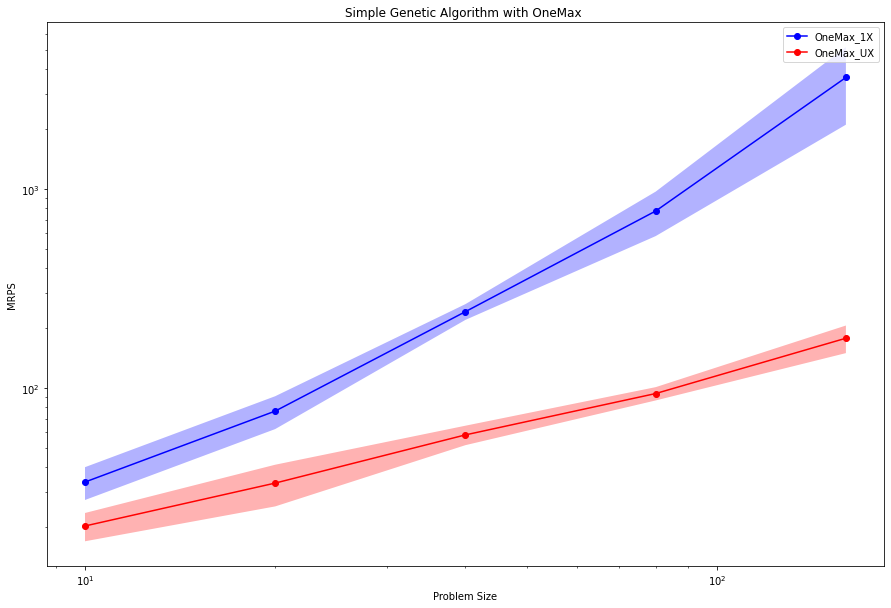

In [32]:
plt.figure(figsize=(15,10))
plt.plot(probSize_om_1X, MRPS_om_1X, 'b', label='OneMax_1X', marker='o')
plt.plot(probSize_om_1X, MRPS_om_UX, 'r', label='OneMax_UX', marker='o')
plt.fill_between(probSize_om_1X, MRPS_om_1X-std_MRPS_om_1X, MRPS_om_1X+std_MRPS_om_1X, facecolor=(0,0,1,0.3))
plt.fill_between(probSize_om_1X, MRPS_om_UX-std_MRPS_om_UX, MRPS_om_UX+std_MRPS_om_UX, facecolor=(1,0,0,0.3))
plt.xscale('log')
plt.yscale('log')
# plt.autoscale(True)
plt.xlabel('Problem Size')
plt.ylabel('MRPS')
plt.title('Simple Genetic Algorithm with OneMax ')
plt.legend()
plt.savefig('MRPS_OneMax.png')
plt.show()

## Vẽ biểu đồ so sánh kết quả Number of Evaluations của phép lai một điểm (1x) với phép lai đồng nhất (UX) cho OneMax

In [40]:
Eva_om_1X = np.array(df_om[df_om['Algorithm'] == 'sGA-1X'].Mean_Evaluations)
Eva_om_UX = np.array(df_om[df_om['Algorithm'] == 'sGA-UX'].Mean_Evaluations)
probSize_om_1X = np.array(df_om[df_om['Algorithm'] == 'sGA-1X'].Problem_size)

In [41]:
std_Eva_om_1X = np.array(df_om[df_om['Algorithm'] == 'sGA-1X'].Std_Evaluations)
std_Eva_om_UX = np.array(df_om[df_om['Algorithm'] == 'sGA-UX'].Std_Evaluations)

In [42]:
print(Eva_om_1X)
print(Eva_om_UX)
print(std_Eva_om_1X)
print(std_Eva_om_UX)
print(probSize_om_1X)

[  1040.2   3171.5  21309.1  77987.9 615620.6]
[  526.3  1348.1  3645.4  8847.6 23049.4]
[   495.58   1152.42   3930.21  46140.44 404579.16]
[  306.65   749.05  1318.75  2308.14 10203.8 ]
[ 10  20  40  80 160]


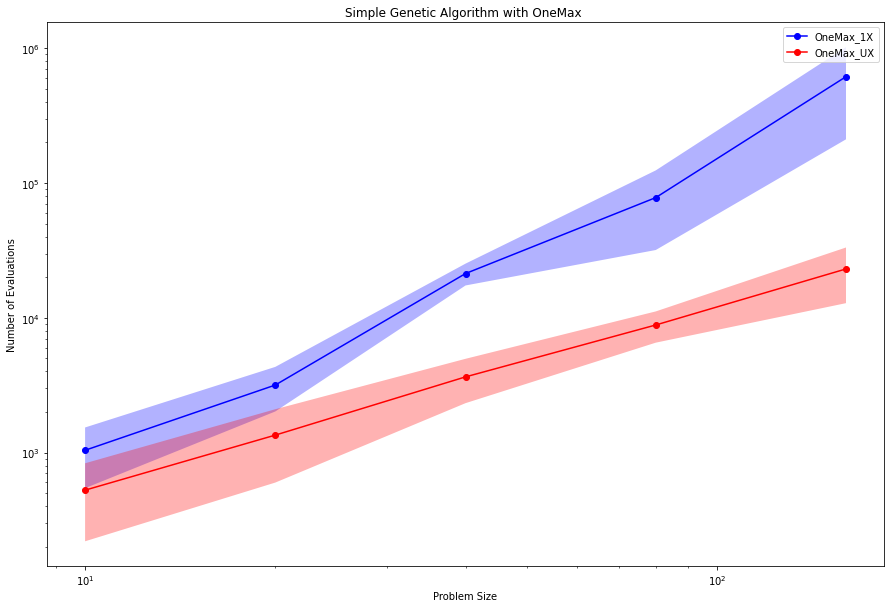

In [43]:
plt.figure(figsize=(15,10))
plt.plot(probSize_om_1X, Eva_om_1X, 'b', label='OneMax_1X', marker='o')
plt.plot(probSize_om_1X, Eva_om_UX, 'r', label='OneMax_UX', marker='o')
plt.fill_between(probSize_om_1X, Eva_om_1X-std_Eva_om_1X, Eva_om_1X+std_Eva_om_1X, facecolor=(0,0,1,0.3))
plt.fill_between(probSize_om_1X, Eva_om_UX-std_Eva_om_UX, Eva_om_UX+std_Eva_om_UX, facecolor=(1,0,0,0.3))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Problem Size')
plt.ylabel('Number of Evaluations')
plt.title('Simple Genetic Algorithm with OneMax ')
plt.legend()
plt.savefig('Evaluations_OneMax.png')
plt.show()

## Vẽ biểu đồ so sánh kết quả MRPS của phép lai một điểm (1x) với phép lai đồng nhất (UX) cho Trap-5

In [15]:
MRPS_trap_1X = np.array(df_trap[df_trap['Algorithm'] == 'sGA-1X'].Mean_MRPS)
MRPS_trap_UX = np.array(df_trap[df_trap['Algorithm'] == 'sGA-UX'].Mean_MRPS)
probSize_trap_1X = np.array(df_trap[df_trap['Algorithm'] == 'sGA-1X'].Problem_size)

In [16]:
std_MRPS_trap_1X = np.array(df_trap[df_trap['Algorithm'] == 'sGA-1X'].Std_MRPS)
std_MRPS_trap_UX = np.array(df_trap[df_trap['Algorithm'] == 'sGA-UX'].Std_MRPS)

In [17]:
print(MRPS_trap_1X)
print(MRPS_trap_UX)
print(std_MRPS_trap_1X)
print(std_MRPS_trap_UX)
print(probSize_trap_1X)

[ 108.8  312.   800.  2828.8    nan]
[ 451.2 3968.     nan    nan    nan]
[ 27.06  72.71 125.58 711.41    nan]
[ 102.65 1234.39     nan     nan     nan]
[ 10  20  40  80 160]


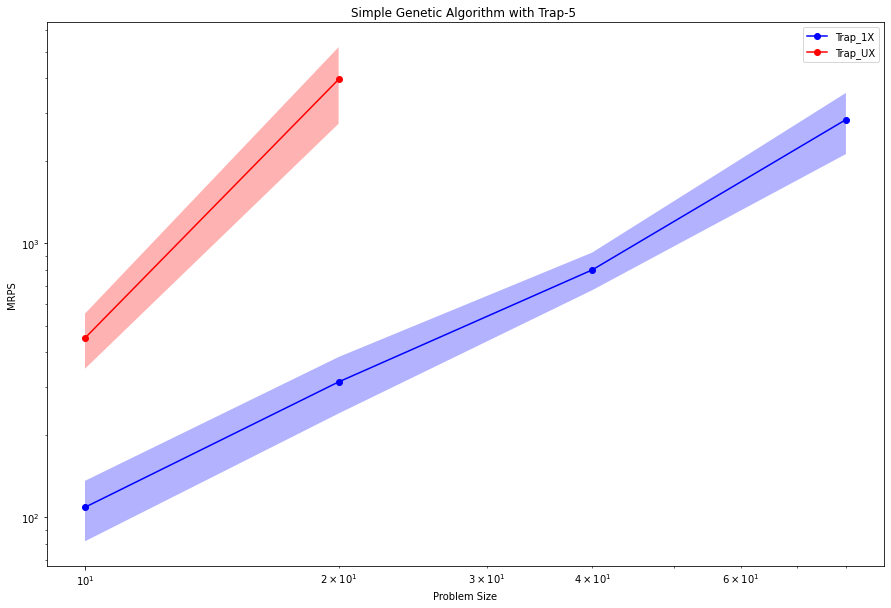

In [34]:
plt.figure(figsize=(15,10))
plt.plot(probSize_trap_1X, MRPS_trap_1X, 'b', label='Trap_1X', marker='o')
plt.plot(probSize_trap_1X, MRPS_trap_UX, 'r', label='Trap_UX', marker='o')
plt.fill_between(probSize_trap_1X, MRPS_trap_1X-std_MRPS_trap_1X, MRPS_trap_1X+std_MRPS_trap_1X, facecolor=(0,0,1,0.3))
plt.fill_between(probSize_trap_1X, MRPS_trap_UX-std_MRPS_trap_UX, MRPS_trap_UX+std_MRPS_trap_UX, facecolor=(1,0,0,0.3))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Problem Size')
plt.ylabel('MRPS')
plt.title('Simple Genetic Algorithm with Trap-5 ')
plt.legend()
plt.savefig('MRPS_Trap5.png')
plt.show()

## Vẽ biểu đồ so sánh kết quả Number of Evaluations của phép lai một điểm (1x) với phép lai đồng nhất (UX) cho Trap-5

In [19]:
Eva_trap_1X = np.array(df_trap[df_trap['Algorithm'] == 'sGA-1X'].Mean_Evaluations)
Eva_trap_UX = np.array(df_trap[df_trap['Algorithm'] == 'sGA-UX'].Mean_Evaluations)
probSize_trap_1X = np.array(df_trap[df_trap['Algorithm'] == 'sGA-1X'].Problem_size)

In [20]:
std_Eva_trap_1X = np.array(df_trap[df_trap['Algorithm'] == 'sGA-1X'].Std_Evaluations)
std_Eva_trap_UX = np.array(df_trap[df_trap['Algorithm'] == 'sGA-UX'].Std_Evaluations)

In [21]:
print(Eva_trap_1X)
print(Eva_trap_UX)
print(std_Eva_trap_1X)
print(std_Eva_trap_UX)
print(probSize_trap_1X)

[  3528.7  15948.7  71521.8 338437.5      nan]
[ 25208.8 325092.       nan      nan      nan]
[  1581.66   8751.79  19004.   190286.25       nan]
[  8987.   222231.78       nan       nan       nan]
[ 10  20  40  80 160]


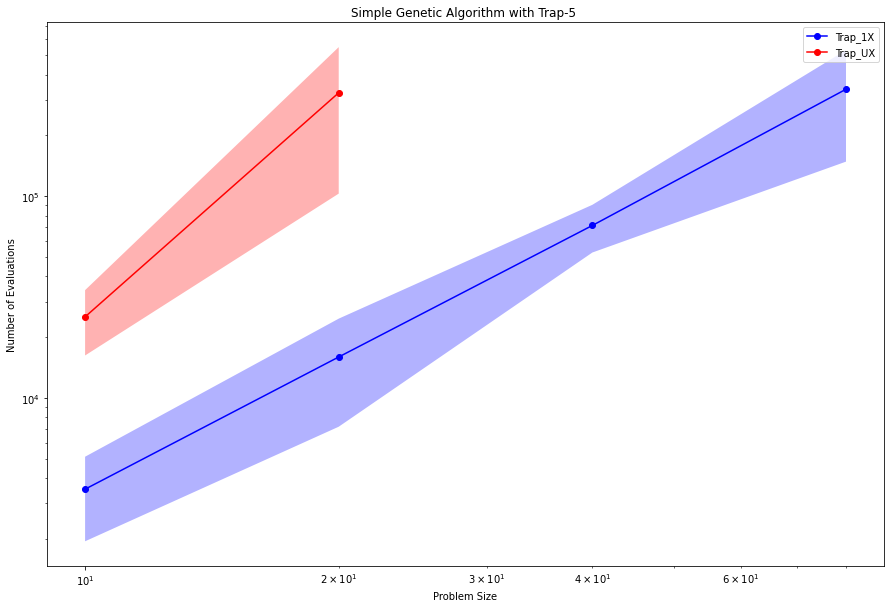

In [35]:
plt.figure(figsize=(15,10))
plt.plot(probSize_trap_1X, Eva_trap_1X, 'b', label='Trap_1X', marker='o')
plt.plot(probSize_trap_1X, Eva_trap_UX, 'r', label='Trap_UX', marker='o')
plt.fill_between(probSize_trap_1X, Eva_trap_1X-std_Eva_trap_1X, Eva_trap_1X+std_Eva_trap_1X, facecolor=(0,0,1,0.3))
plt.fill_between(probSize_trap_1X, Eva_trap_UX-std_Eva_trap_UX, Eva_trap_UX+std_Eva_trap_UX, facecolor=(1,0,0,0.3))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Problem Size')
plt.ylabel('Number of Evaluations')
plt.title('Simple Genetic Algorithm with Trap-5 ')
plt.legend()
plt.savefig('Evaluations_Trap5.png')
plt.show()